In [418]:
#Import all the libraries you may need
import random as rn
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns


In [419]:
#Read the data, learning about the dateset
path = "./Data/alzheimers.csv"
file = pd.read_csv(path)
print(file.head())
print('\n\nDataset Description:')
print(file.describe())
print('\n\nDataset Number of Rows and Columns:')
print(file.shape)
print('\n\nDataset info:')
print(file.info())
print('\n\nDataset type:')
#print(type(file['Quiz Scores']),type(file['Time Spent (hrs)']))

        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0        Healthy                   High      

In [420]:
#Data preparation and data cleaning
# Remove the apostrophe
file.columns = file.columns.str.replace('’', '')
# Remove special characters
file.columns = file.columns.str.replace('(APOE-ε4 allele)', '')
print(file.isnull().sum())
print(file.duplicated().sum())
file.columns

Country                         0
Age                             0
Gender                          0
Education Level                 0
BMI                             0
Physical Activity Level         0
Smoking Status                  0
Alcohol Consumption             0
Diabetes                        0
Hypertension                    0
Cholesterol Level               0
Family History of Alzheimers    0
Cognitive Test Score            0
Depression Level                0
Sleep Quality                   0
Dietary Habits                  0
Air Pollution Exposure          0
Employment Status               0
Marital Status                  0
Genetic Risk Factor             0
Social Engagement Level         0
Income Level                    0
Stress Levels                   0
Urban vs Rural Living           0
Alzheimers Diagnosis            0
dtype: int64
0


Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimers', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor ', 'Social Engagement Level', 'Income Level',
       'Stress Levels', 'Urban vs Rural Living', 'Alzheimers Diagnosis'],
      dtype='object')

The provided code generates count plots to visualize the distribution of several categorical variables in the dataset: Alzheimer’s Diagnosis, Genetic Risk Factor (APOE-ε4 allele), and Diabetes. These features seem to be key factors related to Alzheimer's disease and its potential risk factors. Here’s a detailed conclusion based on the analysis:



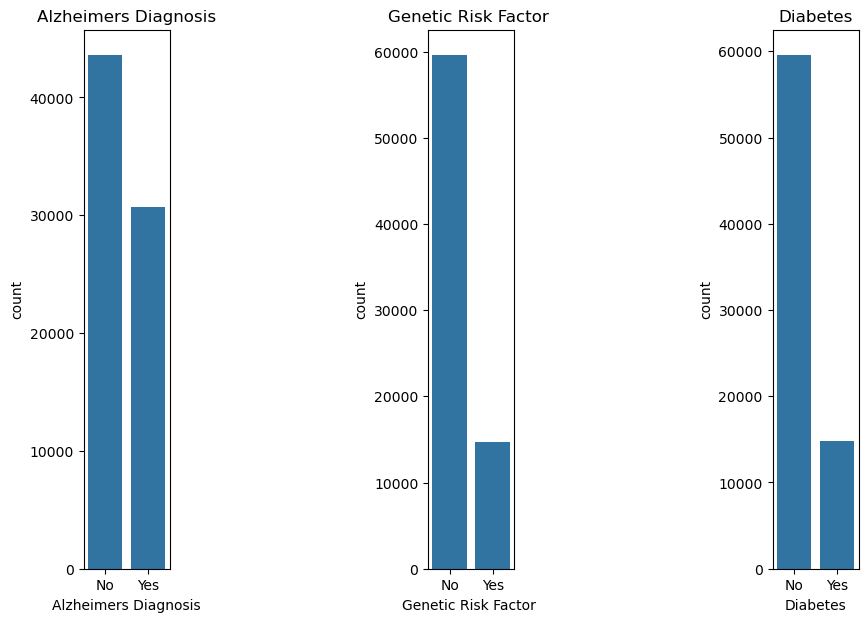

In [421]:
# Visualizing the distribution of the target variable (assuming it's called 'target')
yes_no = ['Alzheimers Diagnosis','Genetic Risk Factor ', 'Diabetes']
ax =plt.figure(figsize=(10, 7))

for i, column in enumerate(yes_no):
    plt.subplot(1, 3, i+1)
    sns.countplot(x= column, data=file)
    plt.title(column)
plt.subplots_adjust(hspace=2, wspace=3)  # Adjust height and width space
plt.show()


 These graphs will help  understand the **distribution** of each numeric feature in the dataset. They will show how the values are spread, whether the data is skewed or normally distributed, and highlight potential outliers or unusual patterns. The KDE adds a layer of smoothing to the histogram, making it easier to visualize the overall shape of the distribution.

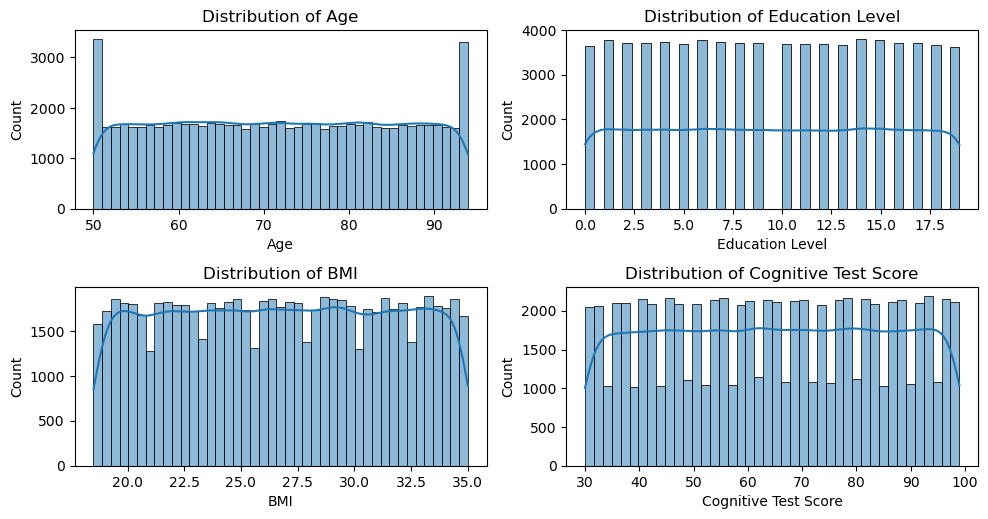

In [422]:
# Visualize the distribution of numerical features
df_numeric = file.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 10))
for i, column in enumerate(df_numeric.columns):
    plt.subplot(4, 2, i+1)
    sns.histplot(df_numeric[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


These Graphs provide a comprehensive way to compare the distribution of each numeric feature against the target variable (`Alzheimer's Diagnosis`), helping you visualize any patterns or differences in these features between the two groups (Alzheimer's vs. non-Alzheimer's).

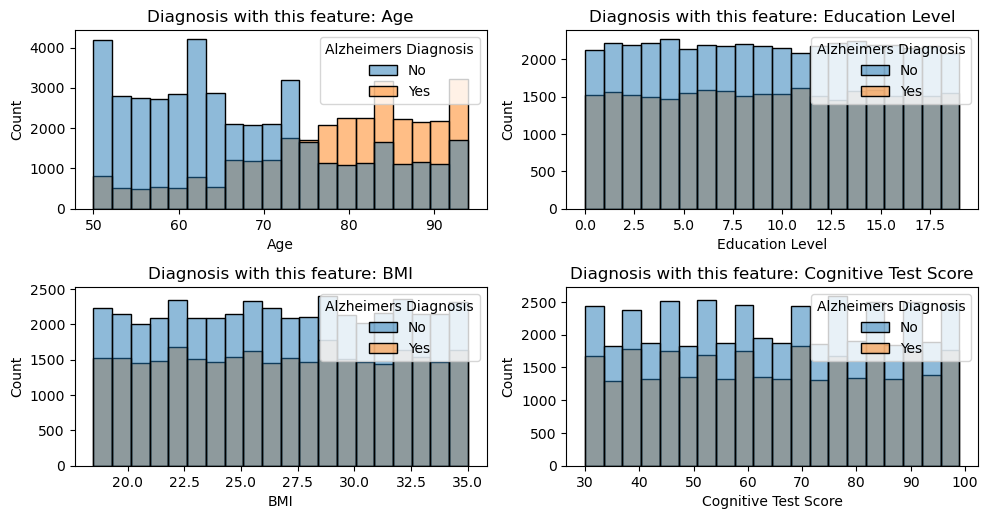

In [423]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(df_numeric.columns):
    plt.subplot(4, 2, i+1)
    sns.histplot(data=file,x=column, bins= 20, hue='Alzheimers Diagnosis');
    plt.title(f'Diagnosis with this feature: {column}')
plt.tight_layout()
plt.show()



The **correlation heatmap** provides an easy-to-understand visualization of the relationships between numerical features in the dataset. By examining it, you can quickly spot which features are strongly correlated, which ones are not, and if there are any possible issues with multicollinearity. This can be useful for feature selection or understanding the dynamics of the dataset before applying machine learning models.

**Age and Cognitive Test Scores** are likely the most important features in predicting whether an individual has Alzheimer's, as they show strong correlations with the diagnosis.
**Education and Gender** do not appear to have strong relationships with cognitive performance, suggesting they might be less critical for direct prediction but could still offer value when combined with other features.
The correlation heatmap provides a clear guide to feature selection and helps identify which features are likely to provide the most valuable insights when training predictive models.




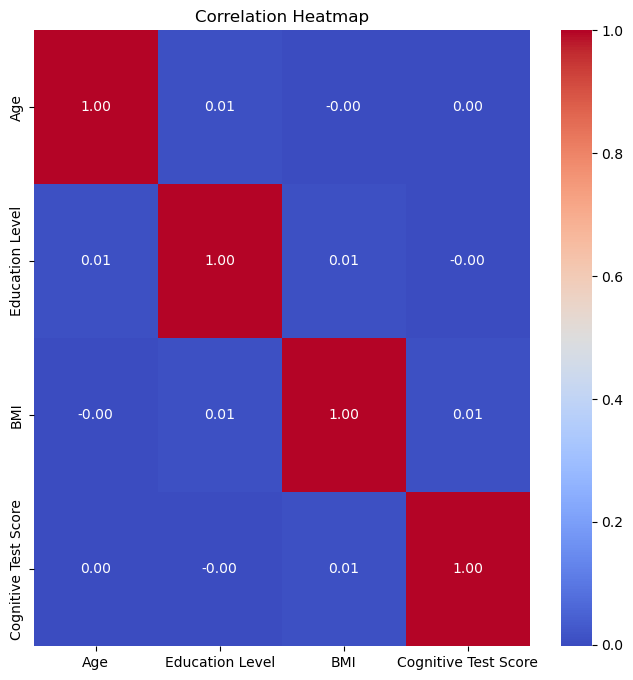

In [424]:
# Correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


The pairplot visualizes the relationships between the selected features: Age, BMI, Cognitive Test Score, and Gender.

The pairplot gives a broad view of how the selected features are related and highlights potential correlations or patterns, especially regarding cognitive decline with age or BMI.

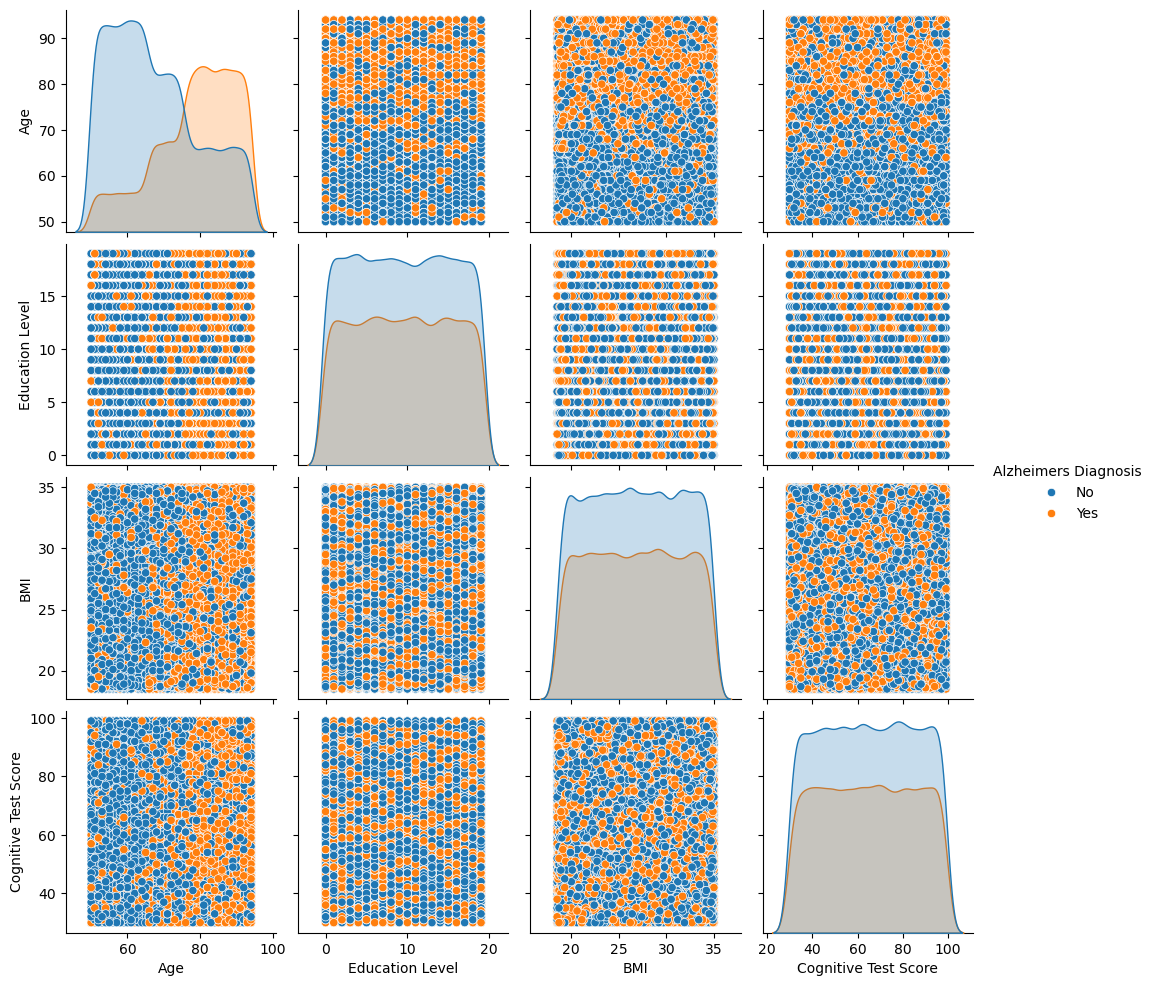

In [429]:
# Visualizing pairplot for selected columns
sns.pairplot(data= file, hue='Alzheimers Diagnosis')
plt.show()


The graph below helps to visualize the relationship between age and cognitive function in the context of Alzheimers disease.
Age appears to be a strong factor influencing cognitive test scores, with Alzheimers patients generally showing lower cognitive performance as age increases.
This suggests that age is an important predictor in identifying individuals at risk for Alzheimers, and the boxplot visually reinforces the idea that cognitive decline tends to accelerate with age in Alzheimers patients.


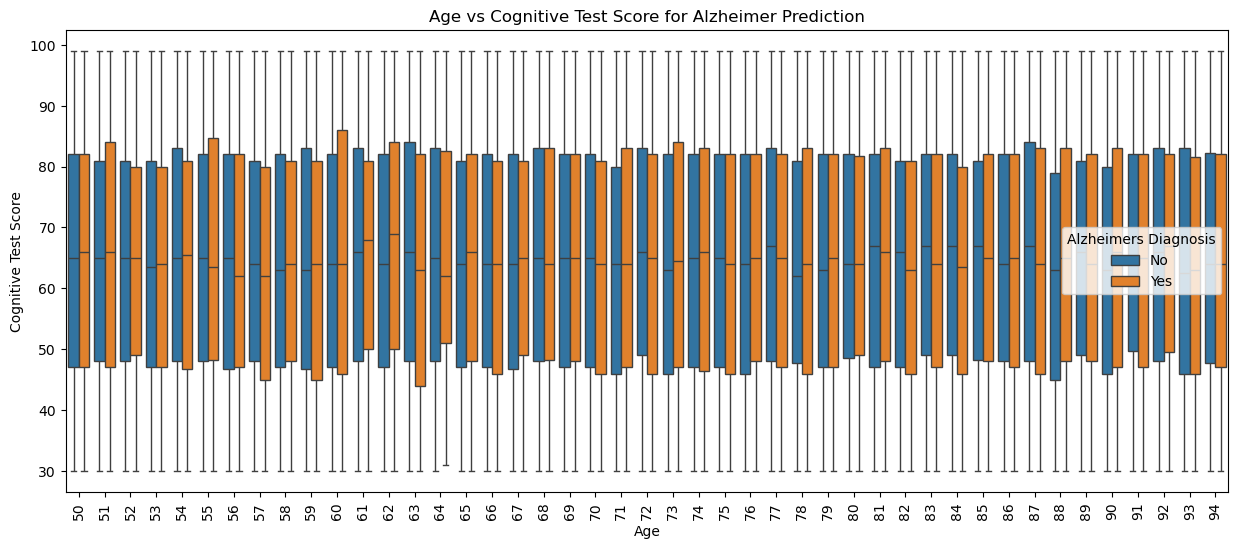

In [426]:
# Compare 'age' feature based on 'Alzheimer Desease'
plt.figure(figsize=(15, 6))
ax = sns.boxplot(y='Cognitive Test Score', x='Age', hue='Alzheimers Diagnosis' ,data=file ,flierprops={'marker': 'P', 'markersize':0.5})
ax.tick_params(axis='x', labelsize=10, labelrotation=90)
plt.title('Age vs Cognitive Test Score for Alzheimer Prediction')
plt.show()


The plot helps uncover potential trends or patterns in the data, especially regarding the relationship between gender, age, and the diagnosis of Alzheimer's disease.
Any significant age differences between male and female subjects in either the Alzheimer’s or non-Alzheimer’s group could provide valuable insights for deeper analysis, such as understanding gender differences in Alzheimer's risk based on age.


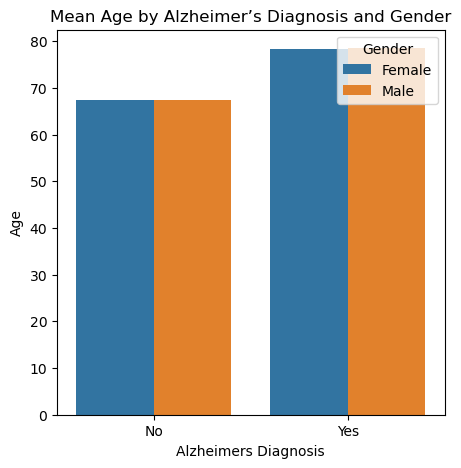

In [427]:
# Group by 'Alzheimer’s Diagnosis' and 'Gender', then calculate mean 'Age'
grouped_df = file.groupby(['Alzheimers Diagnosis', 'Gender'])['Age'].mean().reset_index()

# Bar plot to visualize the mean Age for each Alzheimer's Diagnosis and Gender group
plt.figure(figsize=(5, 5))
sns.barplot(x='Alzheimers Diagnosis', y='Age', hue='Gender', data=grouped_df)
plt.title('Mean Age by Alzheimer’s Diagnosis and Gender')
plt.show()


This boxplot offers a clear visual comparison of cognitive performance by Alzheimer’s diagnosis and gender, highlighting trends or differences in cognitive test scores across different groups.
If there are noticeable differences in cognitive scores based on gender within each diagnosis category, it might suggest that gender could be an important factor in predicting or understanding Alzheimer's disease outcomes.
Additionally, the distribution of the data can provide valuable insights into the overall cognitive test score spread, helping to identify trends or outliers for further analysis.


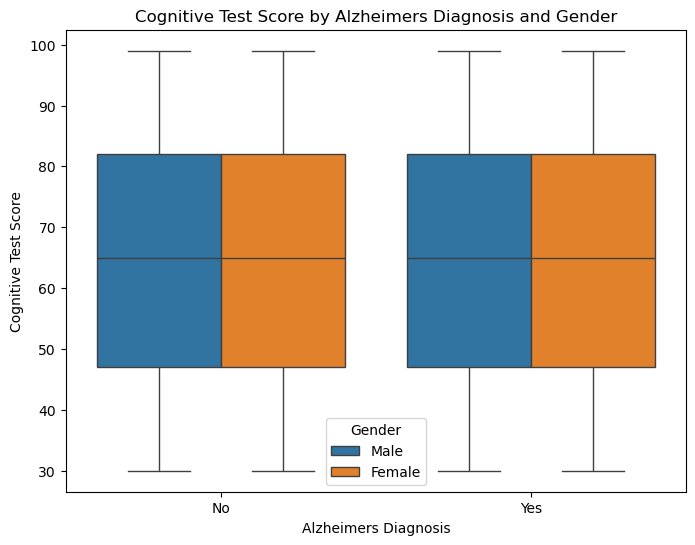

In [428]:
# Boxplot to compare 'Cognitive Test Score' across 'Alzheimer’s Diagnosis' and 'Gender'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Alzheimers Diagnosis', y='Cognitive Test Score', hue='Gender', data=file)
plt.title('Cognitive Test Score by Alzheimers Diagnosis and Gender')
plt.show()


THE END!